In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

c:\users\shris\appdata\local\programs\python\python39\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
import ssl 
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()


170498071/170498071 [==============================] - 150s 1us/step


In [4]:
X_train.shape


(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
X_train=X_train/255.0
X_test=X_test/255.0

In [8]:
y_train.shape

(50000, 1)

In [10]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [11]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [12]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

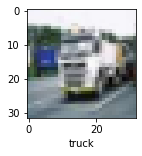

In [17]:
plot_sample(X_train, y_train, 1000)


In [18]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3))),
model.add(layers.MaxPooling2D((2, 2))),
    
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu')),
model.add(layers.MaxPooling2D((2, 2))),
    
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu')),
model.add(layers.MaxPooling2D((2, 2))),
    
model.add(layers.Flatten()),
model.add(layers.Dense(64, activation='relu')),
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10)


Epoch 1/10
1563/1563 [==============================] - 71s 44ms/step - loss: 1.5549 - accuracy: 0.4289
Epoch 2/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.2069 - accuracy: 0.5715
Epoch 3/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.0679 - accuracy: 0.6236
Epoch 4/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9785 - accuracy: 0.6590
Epoch 5/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9098 - accuracy: 0.6816
Epoch 6/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8508 - accuracy: 0.7019
Epoch 7/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8084 - accuracy: 0.7175
Epoch 8/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7691 - accuracy: 0.7320
Epoch 9/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.7333 - accuracy: 0.7413
Epoch 10/10
1563/1563 [==============================] - 63s 40m

TypeError: only integer scalar arrays can be converted to a scalar index

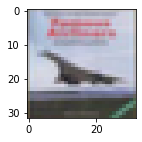

In [23]:
plot_sample(X_test, y_test,3)


In [25]:
y_pred=model.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 9ms/step


array([[1.09762149e-02, 1.72872865e-03, 3.66950943e-03, 8.81716371e-01,
        8.20147805e-04, 9.02827531e-02, 4.27655363e-03, 1.91410771e-03,
        4.10879124e-03, 5.06822253e-04],
       [6.90578134e-04, 3.54329973e-01, 5.19692769e-08, 2.87863736e-06,
        1.89893240e-06, 4.12048365e-07, 2.01061496e-08, 4.98484837e-07,
        6.44942284e-01, 3.14308054e-05],
       [7.59536102e-02, 2.43809193e-01, 6.35316945e-04, 5.18521201e-03,
        2.26901658e-03, 1.68776582e-03, 2.68964970e-04, 2.38443539e-03,
        5.09358704e-01, 1.58447698e-01],
       [9.00084853e-01, 5.10583632e-03, 1.23603723e-03, 3.54522583e-03,
        4.82408702e-03, 5.59272012e-05, 3.50683767e-05, 9.16119370e-06,
        8.46653879e-02, 4.38376243e-04],
       [1.74232246e-05, 7.85413504e-05, 4.56610546e-02, 1.07771866e-01,
        6.73696399e-01, 4.04117517e-02, 1.30587488e-01, 1.36573552e-04,
        1.56176847e-03, 7.71684645e-05]], dtype=float32)

In [26]:
y_classes=[np.argmax(element) for element in y_pred]


In [27]:
y_test[:10]

array([[3],
       [8],
       [8],
       [0],
       [6],
       [6],
       [1],
       [6],
       [3],
       [1]], dtype=uint8)

In [28]:
y_classes[:10]

[3, 8, 8, 0, 4, 6, 1, 6, 3, 1]